<img src="https://www.earthsystemcog.org/site_media/logos/gfs4c.png">

## Archive GFS Forecast Grib Files
Some days are missing...

Roughly 10 days behind current date 

* https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [1]:

import pygrib

# Random Library Imports
import os,glob,re,time

# Importing Datetime Libraries
from datetime import datetime, timedelta

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Numerical and Scientific Libraries
import numpy as np
from scipy.ndimage import gaussian_filter

# MetPy Libraries
from metpy.plots import add_metpy_logo

# Matplotlib Plotting Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker

# Warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec
print("done.")


done.


In [2]:
# Set the font 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [3]:
cd ~/Downloads/

/Users/chowdahead/Downloads


In [4]:
import Vorticity_Color_Bar as vort_cmap
vort_cmapz = vort_cmap.my_cmap

## Search the current working drive for files that start with gfs

In [15]:
ls gfs_*

gfs_4_20191115_0000_000.grb2  gfs_4_20191115_0000_003.grb2


## Use ```glob``` to grab the names of all the gfs files

In [17]:
grib_list = glob.glob('gfs_*003.grb2')
grib_list = sorted(grib_list, key=lambda x: int(re.sub('\D', '', x)))
print(grib_list)

['gfs_4_20191115_0000_003.grb2']


## Grabbing the first grib file from our list will allow us to explore the data
* Each entry of the file is a different variable (specified at different heights for most)
* There are over 500 variables for a GFS grib file!!

In [18]:
#grib = "gfsanl_3_20190129_1200_000.grb2" # Set the file name of your input GRIB file
grbs = pygrib.open(grib_list[0])
grb = grbs.read()

### Since there's so many variables, lets just print out the first 10 to get an idea of what the file looks like

In [19]:
grb[0:10]

[1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 3 hrs:from 201911150000,
 2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 3 hrs:from 201911150000,
 3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 3 hrs:from 201911150000,
 4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 3 hrs:from 201911150000,
 5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 3 hrs:from 201911150000,
 6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 3 hrs:from 201911150000,
 7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 3 hrs:from 201911150000,
 8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 3 hrs:from 201911150000,
 9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 3 hrs:from 201911150000,
 10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:leve

### There is a built in search by name function, but the exact name has be specified

In [20]:
grbs.select(name="MSLP")

ValueError: no matches found

In [22]:
grbs.select(name="MSLP (Eta model reduction)")

[419:MSLP (Eta model reduction):Pa (instant):regular_ll:meanSea:level 0:fcst time 3 hrs:from 201911150000]

In [21]:
MSLP = grbs.select(name="MSLP (Eta model reduction)")

In [23]:
hgt_500 = grbs.select(name="Geopotential Height",level=500)[0].values
vort_500 = grbs.select(name="Absolute vorticity",level=500)[0].values

In [24]:
hgt_500

array([[5221.7383, 5221.7383, 5221.7383, ..., 5221.7383, 5221.7383,
        5221.7383],
       [5218.3384, 5218.3784, 5218.3984, ..., 5218.2583, 5218.2983,
        5218.3184],
       [5215.058 , 5215.098 , 5215.138 , ..., 5214.9185, 5214.9585,
        5215.0186],
       ...,
       [5100.058 , 5100.158 , 5100.2583, ..., 5099.7583, 5099.8584,
        5099.9585],
       [5097.058 , 5097.098 , 5097.138 , ..., 5096.9185, 5096.9585,
        5097.0186],
       [5093.4985, 5093.4985, 5093.4985, ..., 5093.4985, 5093.4985,
        5093.4985]], dtype=float32)

## Grab subsets of data based off variable name:

### Geopotential Heights:

In [14]:
GeoHeight = [i for i in grbs.select(name="Geopotential Height")]
GeoHeight[0]

12:Geopotential Height:gpm (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000

In [15]:
Temp = [i for i in grbs.select(name="Temperature")]
Temp[0:5]

[13:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000,
 17:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 201911150000,
 23:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201911150000,
 29:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 0 hrs:from 201911150000,
 35:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201911150000]

In [16]:
AbVort = [i for i in grbs.select(name="Absolute vorticity")]
AbVort[0:5]


[14:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000,
 51:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201911150000,
 55:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 1500 Pa:fcst time 0 hrs:from 201911150000,
 62:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 0 hrs:from 201911150000,
 69:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 0 hrs:from 201911150000]

## Each entry in our new list is a ```pygrib.gribmessage```

* https://jswhit.github.io/pygrib/docs/pygrib.gribmessage-class.html

In [17]:
type(GeoHeight[0])

pygrib.gribmessage

## Analysis datetime ```analDate```

In [18]:
GeoHeight[0].analDate

datetime.datetime(2019, 11, 15, 0, 0)

### Since it is easier to call the variables from the grib file by the entry index, the ```.messagenumber``` instance varibale will find that for us:

In [19]:
GeoHeight[0].messagenumber,grbs[GeoHeight[0].messagenumber]

(12,
 12:Geopotential Height:gpm (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 201911150000)

## Looking to find which index in the whole ```grib``` file is 500mb Geopotential Heights:
* Note: in the pygrib.gribmessage, the level is indicated with Pa, yet when calling the ```pygrib.gribmessage["level"]``` key, it has to be called with hPa. I have no idea why this is, and would have to dive a bit further into the docs...

Find the level of ```GeoHeight[0]```:

In [20]:
GeoHeight[0]["level"]

40

In [21]:
for i in GeoHeight:
    if i["level"] == 500: # !!Look for the 500 hPa not 50000 Pa!!
        mb500_lev_index = i.messagenumber
        print(i,f"\nGrib variable index: {i.messagenumber}")


214:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 50000 Pa:fcst time 0 hrs:from 201911150000 
Grib variable index: 214


### The data values, lats, and lons are in different entries of each variable speficied at a height

In [22]:
GeoHeight[0].data() # comes out as arrays

(array([[50009.05 , 50009.05 , 50009.05 , ..., 50009.05 , 50009.05 ,
         50009.05 ],
        [49947.61 , 49948.09 , 49948.41 , ..., 49946.33 , 49946.81 ,
         49947.13 ],
        [49897.367, 49898.008, 49898.81 , ..., 49895.45 , 49895.93 ,
         49896.73 ],
        ...,
        [56323.29 , 56323.29 , 56323.29 , ..., 56323.45 , 56323.29 ,
         56323.29 ],
        [56347.77 , 56347.77 , 56347.61 , ..., 56348.09 , 56348.09 ,
         56347.93 ],
        [56365.848, 56365.848, 56365.848, ..., 56365.848, 56365.848,
         56365.848]], dtype=float32),
 array([[ 90.,  90.,  90., ...,  90.,  90.,  90.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.],
        [ 88.,  88.,  88., ...,  88.,  88.,  88.],
        ...,
        [-88., -88., -88., ..., -88., -88., -88.],
        [-89., -89., -89., ..., -89., -89., -89.],
        [-90., -90., -90., ..., -90., -90., -90.]]),
 array([[  0.,   1.,   2., ..., 357., 358., 359.],
        [  0.,   1.,   2., ..., 357., 358., 359.],
       

# With this data now parsed, we can try plotting

### Clean up some of the variables we will plot by taking a lat/lon subset:

In [25]:
mslp = MSLP[0] # [0] since MSLP is a list?
mslp_data, lats, lons = mslp.data(lat1=20,lat2=70,lon1=220,lon2=320)
mslp_data = gaussian_filter(mslp_data, 3)/100

hgt_500 = grbs.select(name="Geopotential Height",level=500)[0].data(lat1=20,lat2=70,lon1=220,lon2=320)
vort_500 = grbs.select(name="Absolute vorticity",level=500)[0].data(lat1=20,lat2=70,lon1=220,lon2=320)

### The date can be grabbed from the data as well:

In [30]:
print(f"Data Date: {mslp['dataDate']}")
print(f"Hour: {mslp['hour']}")
print(f"Minute: {mslp['minute']}")
print(f"Forecast Time: {mslp['forecastTime']}")
print(f"Data Time: {mslp['dataTime']}")
#file_time = str(mslp['dataDate'])+"_"+str(mslp['hour'])+str(mslp['hour'])
      
Date = mslp['dataDate']
Year = mslp['year']
Month = mslp['month']  
Day = mslp['day']
Hour = mslp['hour']
Minute = mslp['minute']
InitHour = mslp['dataTime']
ForecastHour = mslp['forecastTime']
print(type(Minute))    

if Hour < 10:
    Hour = f"0{Hour}"
if Minute < 10:
    Minute = f"0{Minute}"
if InitHour < 10:
    InitHour = f"0{InitHour}"
if ForecastHour < 10:
    ForecastHour = f"00{ForecastHour}"
if 10 < int(ForecastHour) < 100:
    ForecastHour = f"0{ForecastHour}"
      
title_date = f"{Year}-{Month}-{Day}"  
#forecast_hour = 
file_time = f"{Date}_{InitHour}00Z_F{ForecastHour}"
file_time, title_date,InitHour

Data Date: 20191115
Hour: 0
Minute: 0
Forecast Time: 3
Data Time: 0
<class 'int'>


('20191115_0000Z_F003', '2019-11-15', '00')

In [32]:
# Add Map Features
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lakes',scale='50m', facecolor='none')

country_borders = cfeature.NaturalEarthFeature(category='cultural',
    name='admin_0_countries',scale='50m', facecolor='none')

# Colorbar Axis Placement (under figure)
colorbar_axis = [0.218, 0.01, 0.589, 0.03] # [left, bottom, width, height]

# Lat/Lon Extents [lon0,lon1,lat0,lat1]
extent = [-180., -60, 20., 70.]

kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
              'rightside_up': True, 'use_clabeltext': True}

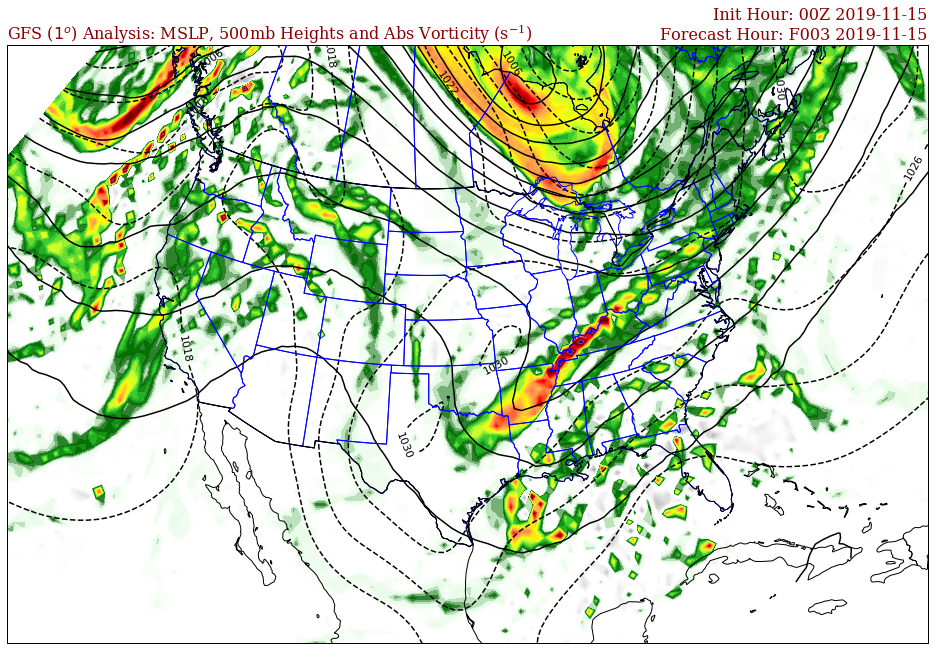

CPU times: user 41.6 s, sys: 397 ms, total: 42 s
Wall time: 43.1 s


In [38]:
%%time
# Create new figure
datacrs = ccrs.PlateCarree()
plotcrs = ccrs.NorthPolarStereo(central_longitude=-100.0)

fig = plt.figure(figsize=(17., 11.))

add_metpy_logo(fig, 30, 925, size='small')

# Add the map and set the extent
ax = plt.subplot(111, projection=plotcrs)

ax.set_extent([-125, -70, 20, 55], ccrs.PlateCarree())

# Add state boundaries to plot
ax.add_feature(states_provinces, edgecolor='blue', linewidth=1,zorder=10)

# Add country borders to plot
ax.add_feature(country_borders, edgecolor='black', linewidth=1,zorder=10)

# Plot Title
plt.title(f"GFS ($0.5^o$) Analysis: {title_date}", fontsize=16,loc='left')
ax.set_title('GFS ($1^o$) Analysis: MSLP, 500mb Heights and Abs Vorticity '+ "("+"$\mathregular{s^{-1}}$"+")", 
                 size=16, loc='left',fontdict=font)
    
ax.set_title(f"Init Hour: {InitHour}Z {title_date}\nForecast Hour: F{ForecastHour} {title_date}",
                 size=16, loc='right',fontdict=font)

'''
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-125, -110, -95, -80, -70])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
'''

vort_levels = vort_cmap.vort_levels

cs = ax.contour(lons, lats, mslp_data,np.arange(970,1040,4),colors='k',linestyles='dashed',transform=datacrs)#cmap='nipy_spectral'
plt.clabel(cs, **kw_clabels)

cs2 = ax.contour(lons, lats, hgt_500[0],np.arange(5000,6000,75),transform=datacrs,colors="k")

cs3 = ax.contourf(lons, lats, vort_500[0],vort_levels,transform=datacrs,cmap=vort_cmapz)
#cbaxes = fig.add_axes(colorbar_axis) # [left, bottom, width, height]
#cbar = plt.colorbar(cs2, orientation='horizontal',cax=cbaxes)

plt.show()
outfile=f"/Users/chowdahead/Documents/GitHub/Python-Jupyter/Jupyter-Notebooks/Gribs-Examples/GFS_4_mslp_500_hgts_vort_{file_time}_F{ForecastHour}.png"
fig.savefig(outfile,bbox_inches='tight',dpi=120)